In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

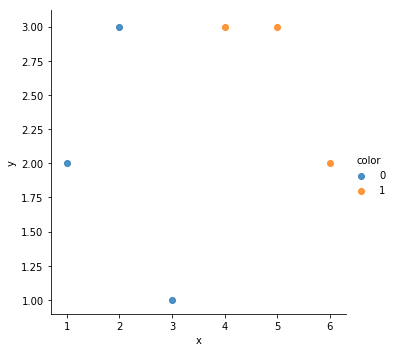

In [2]:
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]
x = np.asarray(x_data)
y = np.reshape(y_data,[-1])
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], color=y))
sns.lmplot('x', 'y', data=df, hue='color', fit_reg=False)
plt.show()

In [3]:
X = tf.placeholder(tf.float32,[None,2])
Y = tf.placeholder(tf.float32,[None,1])

logits = tf.layers.dense(X,1,activation=None)

Y_ = tf.nn.sigmoid(logits)
predict = tf.round(Y_)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y))
train = tf.train.AdamOptimizer(0.01).minimize(cost)


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10001):
    c,_ = sess.run([cost,train],feed_dict={X:x_data,Y:y_data})
    if i%1000==0:
        print('cost:',c)
print('Finish')

cost: 0.58628243
cost: 0.10248116
cost: 0.041345682
cost: 0.020948762
cost: 0.011664774
cost: 0.0068086865
cost: 0.0040771943
cost: 0.0024770952
cost: 0.0015175998
cost: 0.00093433197
cost: 0.000576908
Finish


In [7]:
sess.run([predict],feed_dict={X:x_data})

[array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32)]